In [1]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

In [6]:
# Load the data
data = pd.read_csv('data.csv')

C:\Users\juanm\AppData\Local\Temp\ipykernel_1132\2911965148.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datarelevant['Tiempo'] = (datarelevant['Fecha_fin_seguimiento']-datarelevant['Fecha_entrada']).dt.days


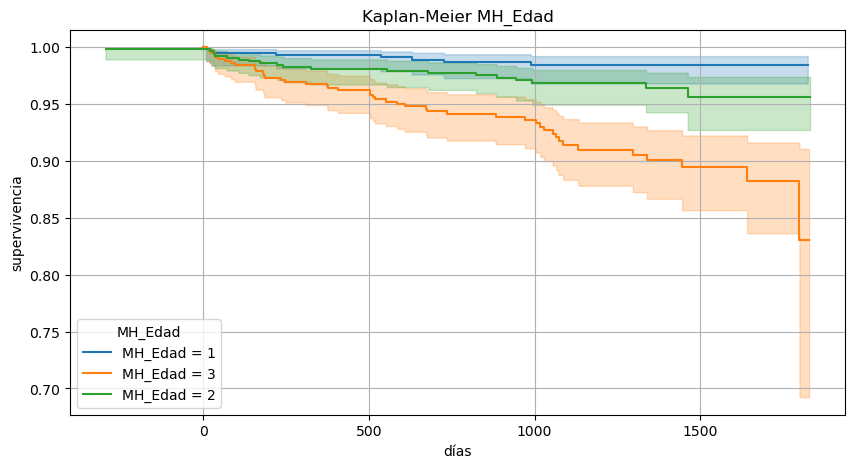

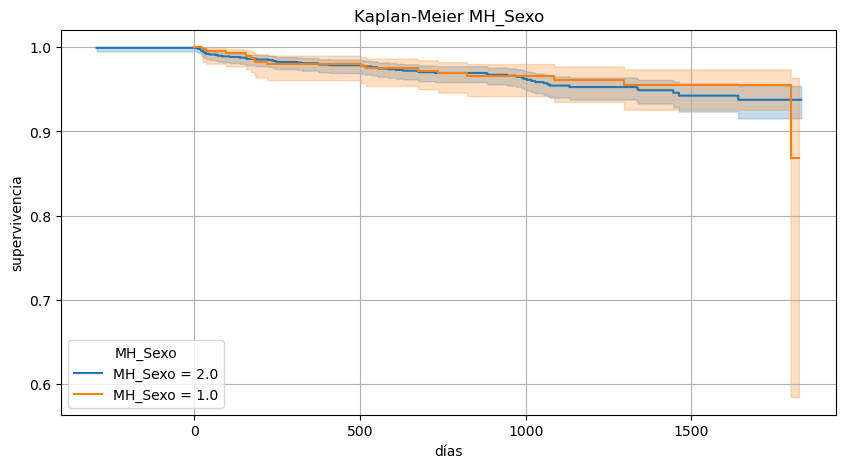

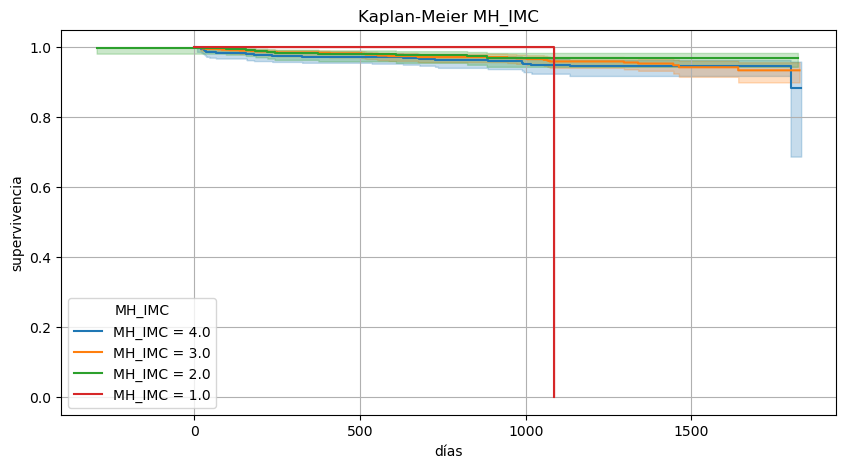

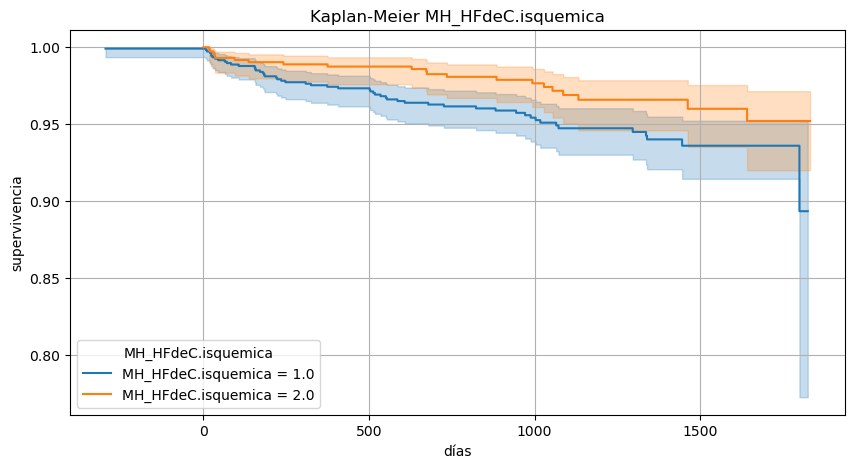

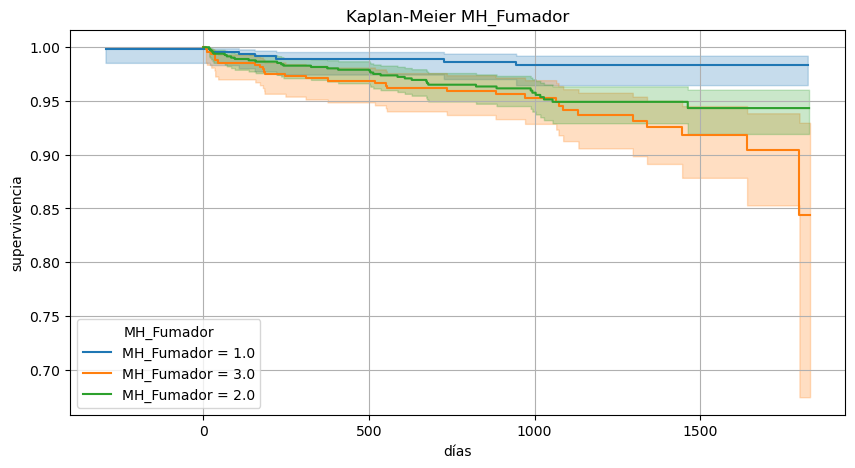

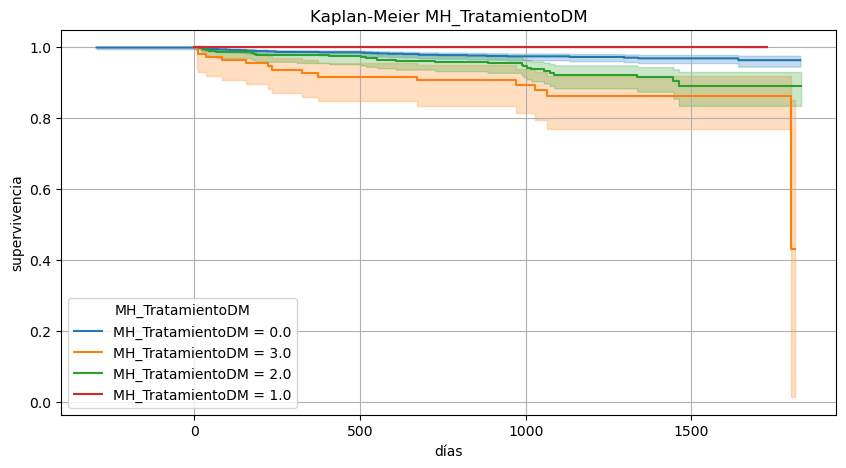

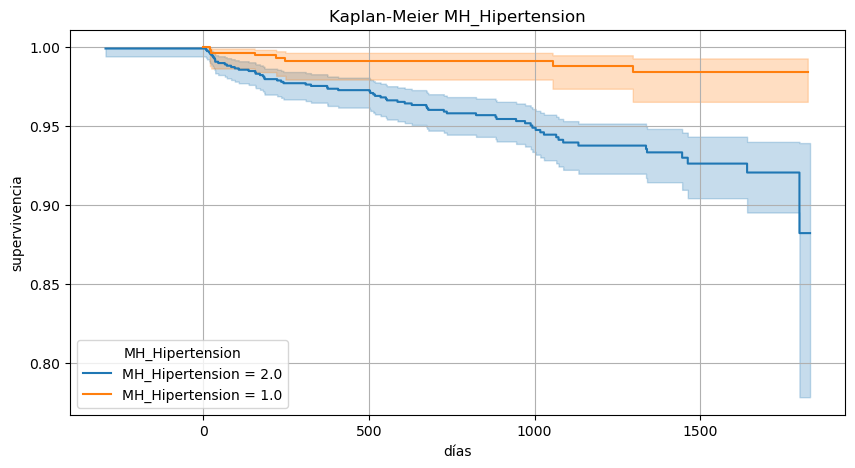

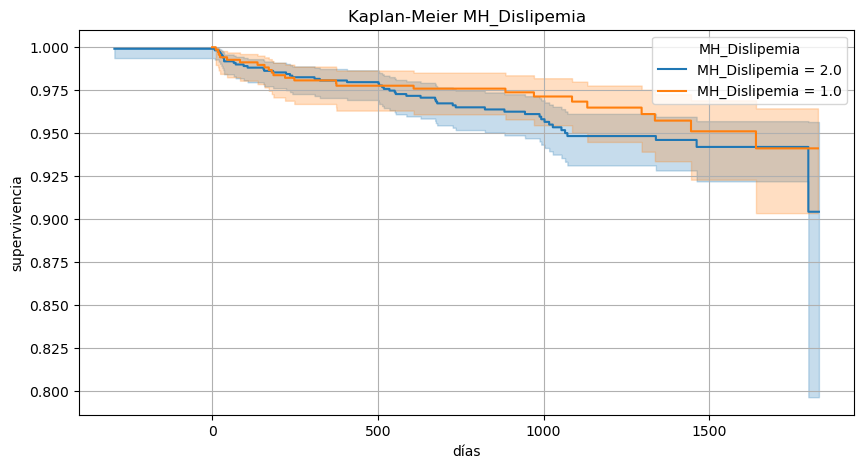

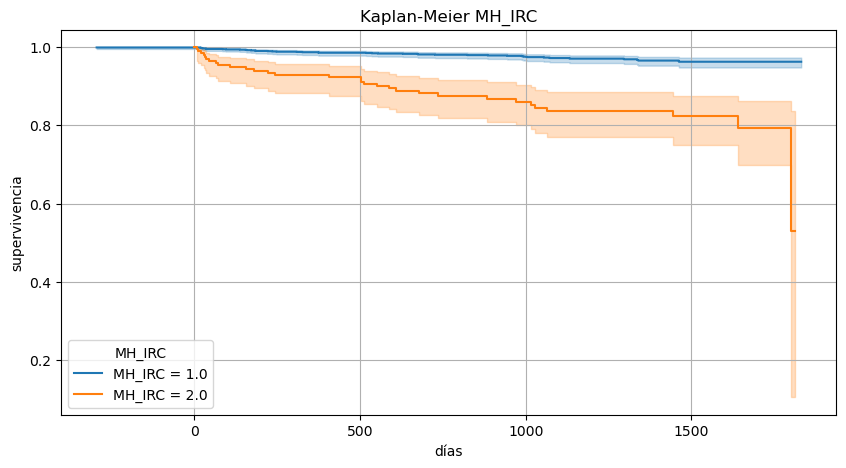

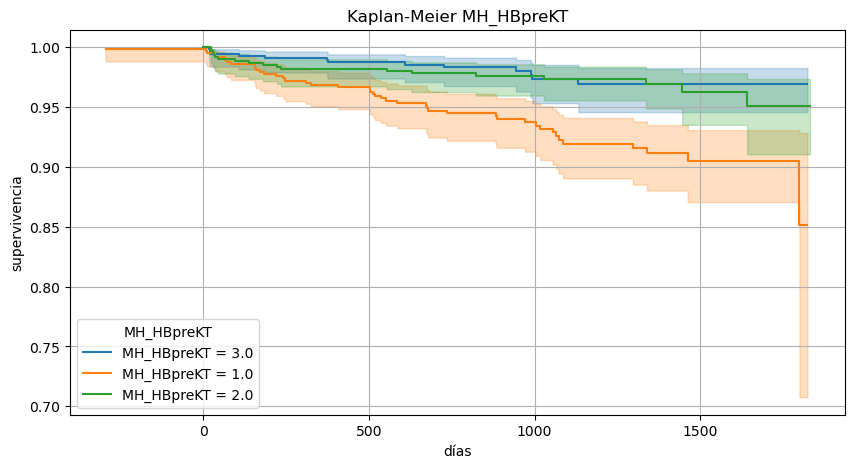

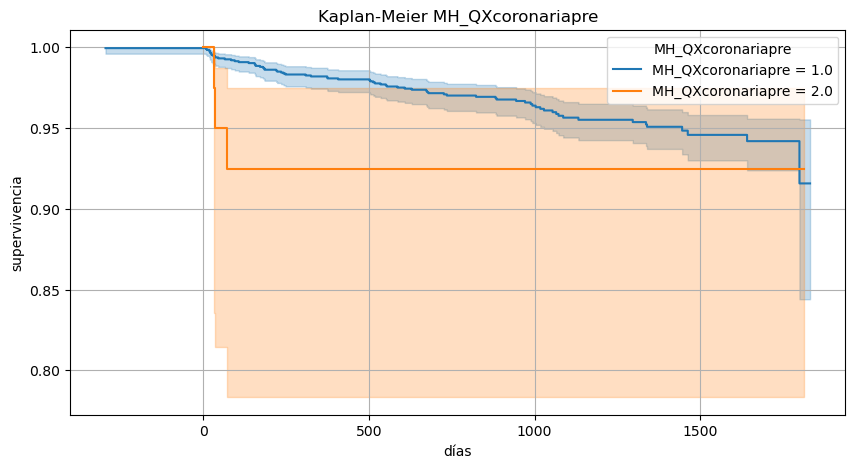

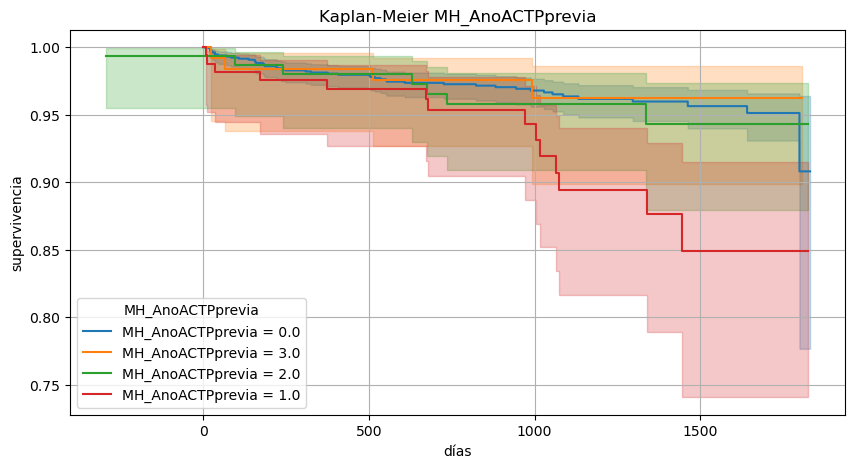

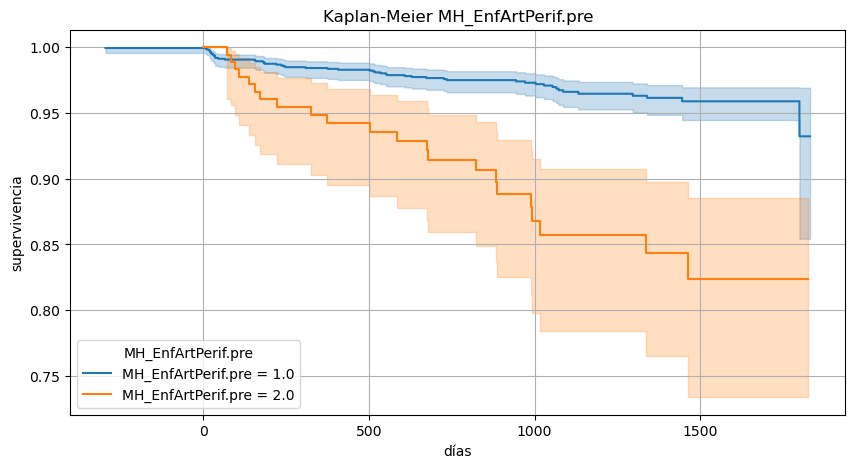

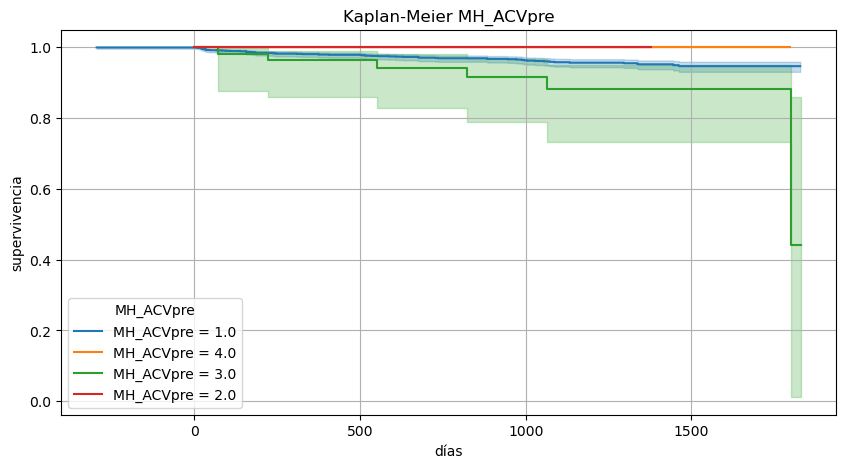

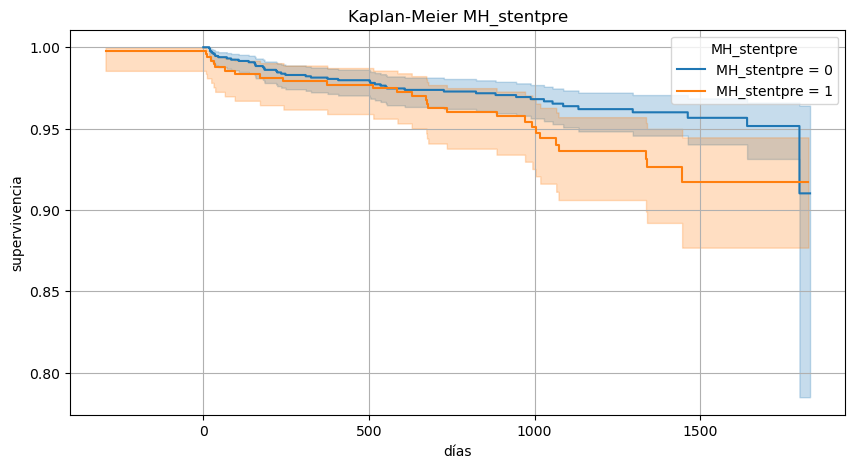

In [7]:
## MEDICAL HISTORY

data['Fecha_entrada'] = pd.to_datetime(data['FOL_FechaEntrada'], errors='coerce')
data['Fecha_fin_seguimiento'] = pd.to_datetime(data['FOL_FechaEstadoVital'], errors='coerce')
datarelevant = data.dropna(subset=['Fecha_entrada', 'Fecha_fin_seguimiento'])
datarelevant['Tiempo'] = (datarelevant['Fecha_fin_seguimiento']-datarelevant['Fecha_entrada']).dt.days
datarelevant = datarelevant.dropna(subset=['Tiempo', 'Muerte CV', 'MH_Sexo'])
mh_columns = [col for col in datarelevant.columns if col.startswith('MH_')]

# KaplanMeierFitter
kmf = KaplanMeierFitter()

# gráficos de Kaplan-Meier para cada variable MH_
for mh_col in mh_columns:
    plt.figure(figsize=(10, 5))
    for i in datarelevant[mh_col].dropna().unique():
        ix = datarelevant[mh_col] == i
        kmf.fit(datarelevant['Tiempo'][ix], datarelevant['Muerte CV'][ix], label=f"{mh_col} = {i}")
        kmf.plot()
    plt.title(f'Kaplan-Meier {mh_col}')
    plt.xlabel('días')
    plt.ylabel('supervivencia')
    plt.legend(title=mh_col)
    plt.grid(True)
    plt.show()

C:\Users\juanm\AppData\Local\Temp\ipykernel_1132\573640196.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datarelevant['Tiempo'] = (datarelevant['Fecha_fin_seguimiento']-datarelevant['Fecha_entrada']).dt.days


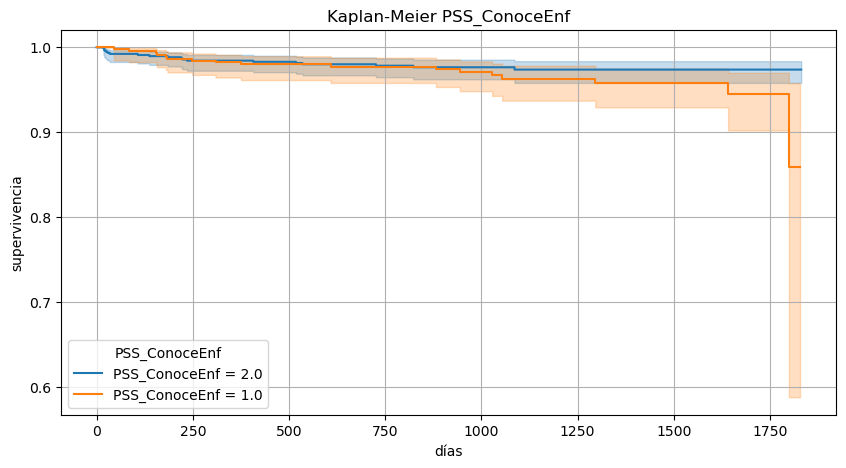

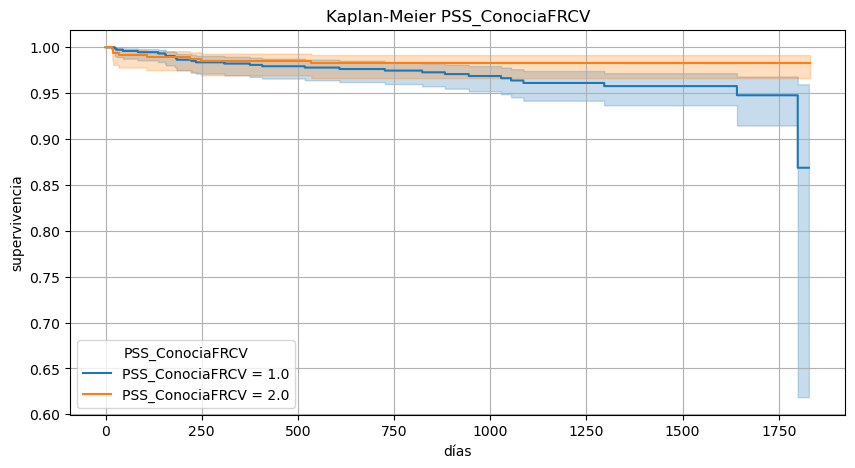

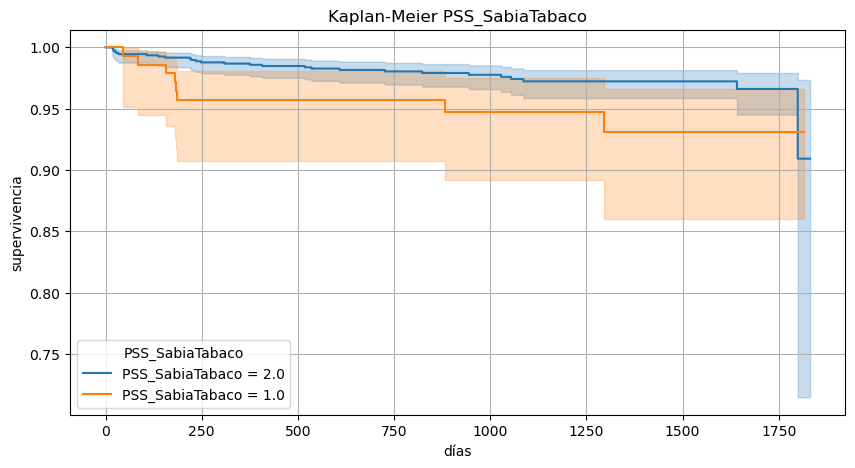

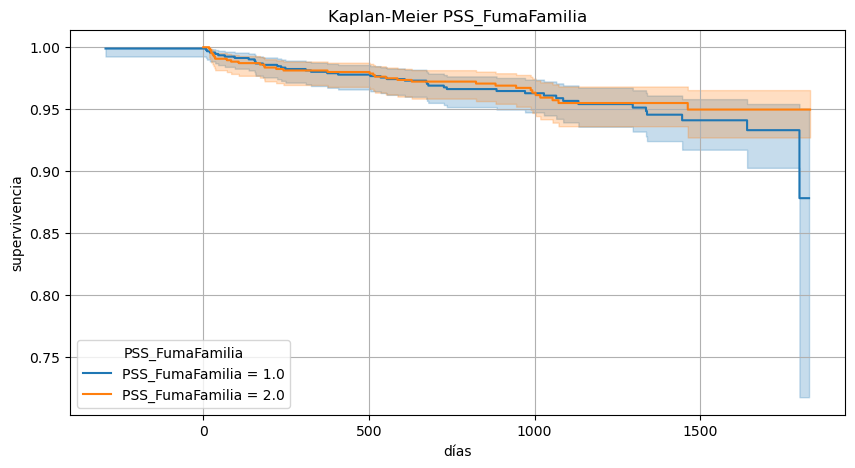

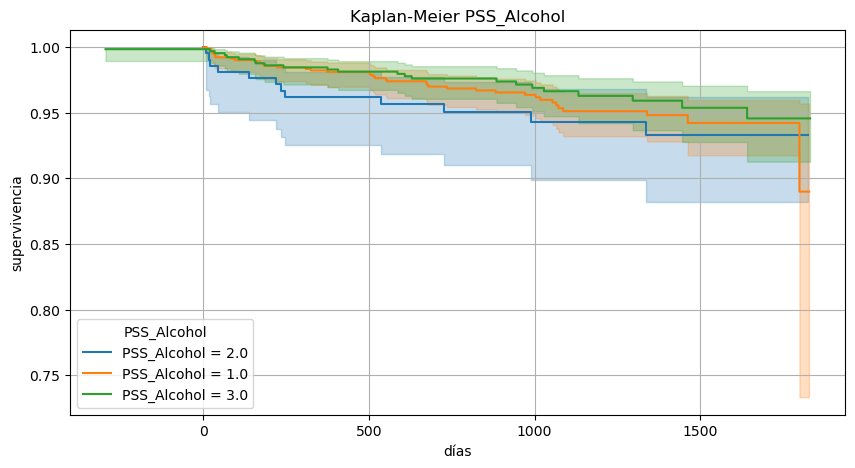

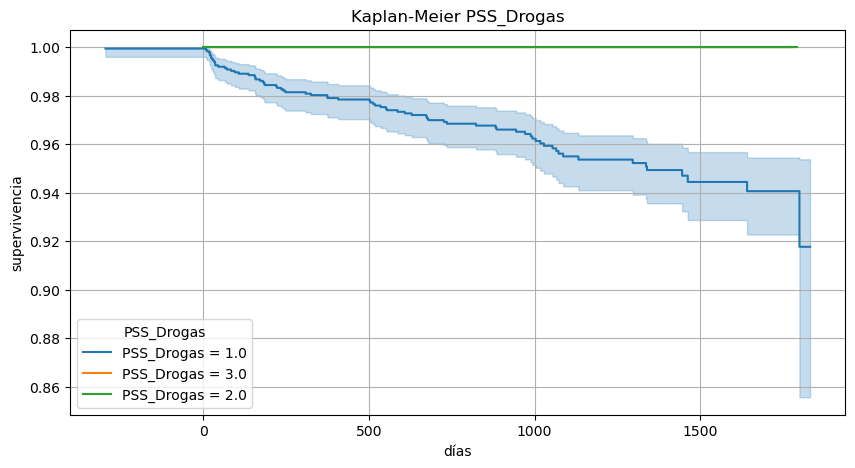

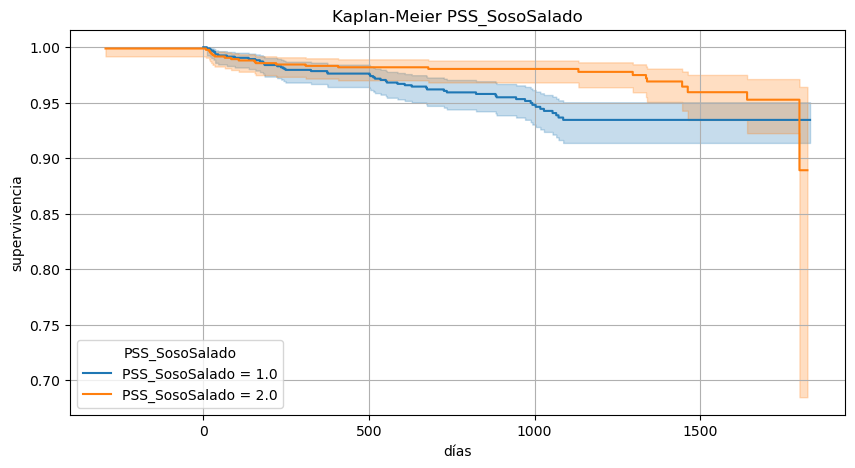

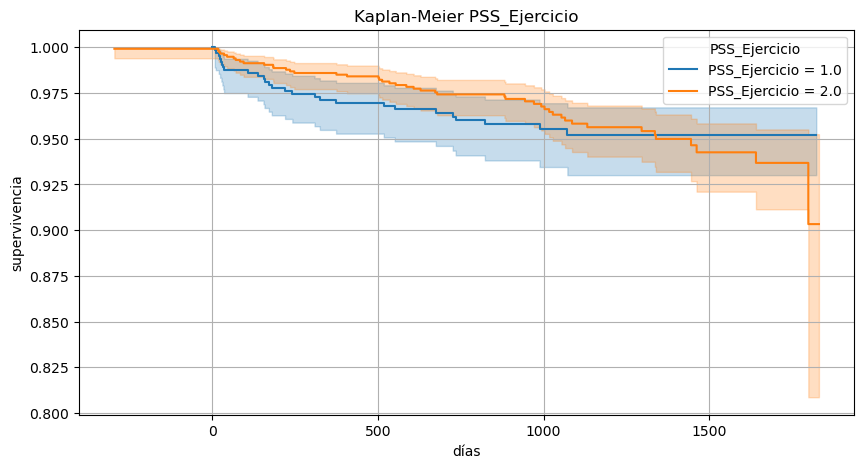

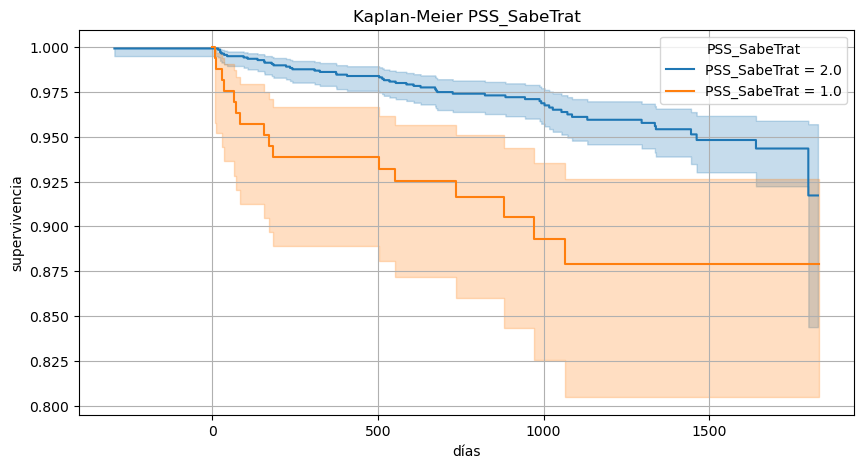

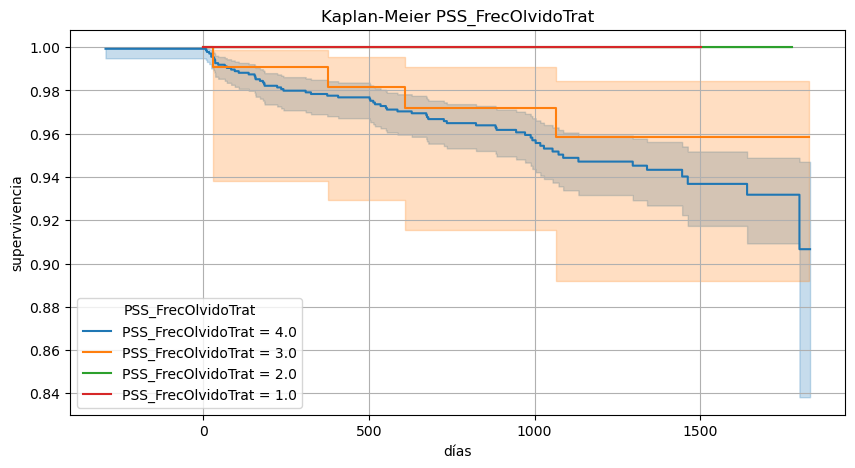

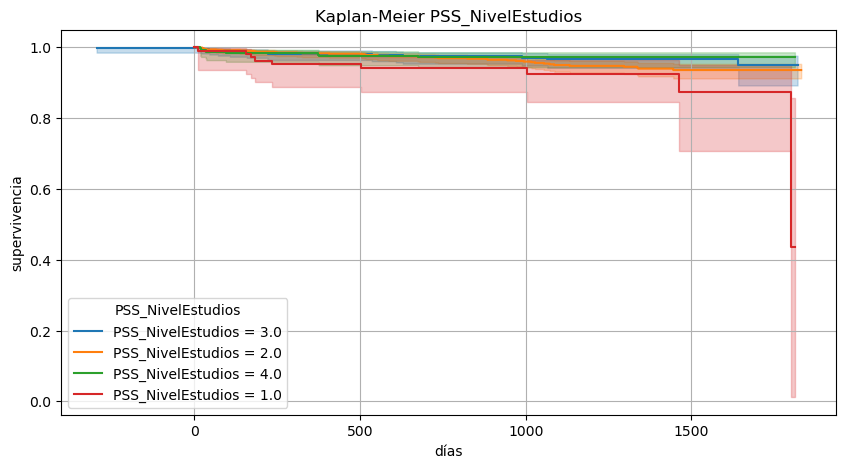

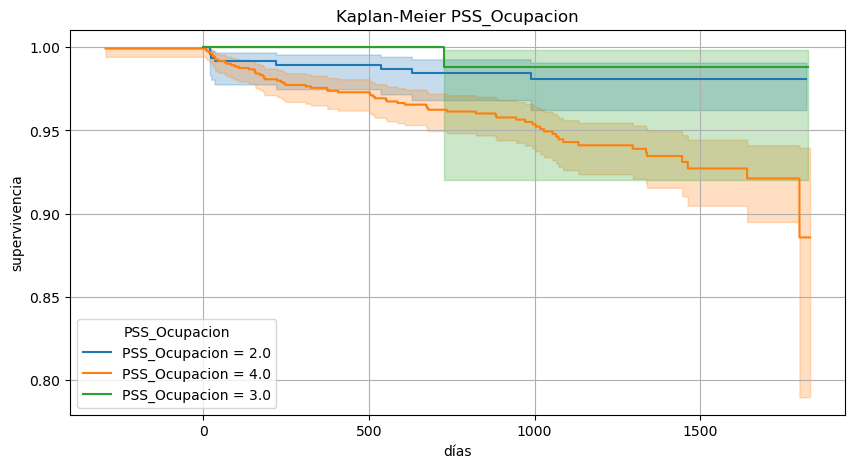

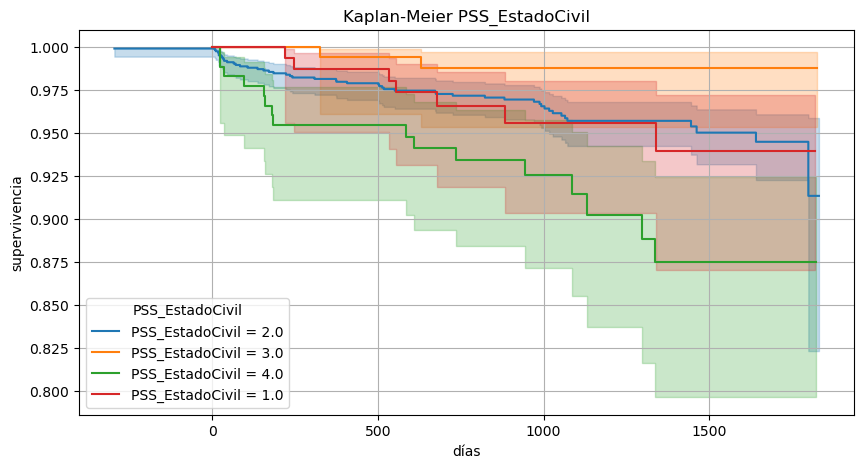

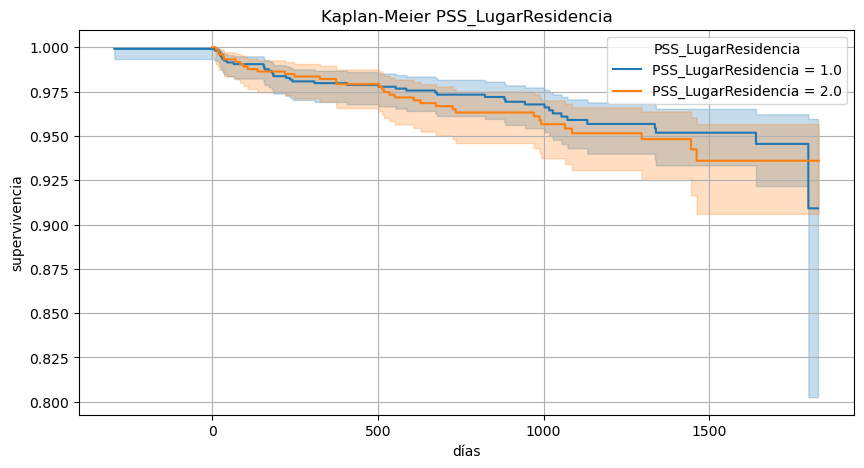

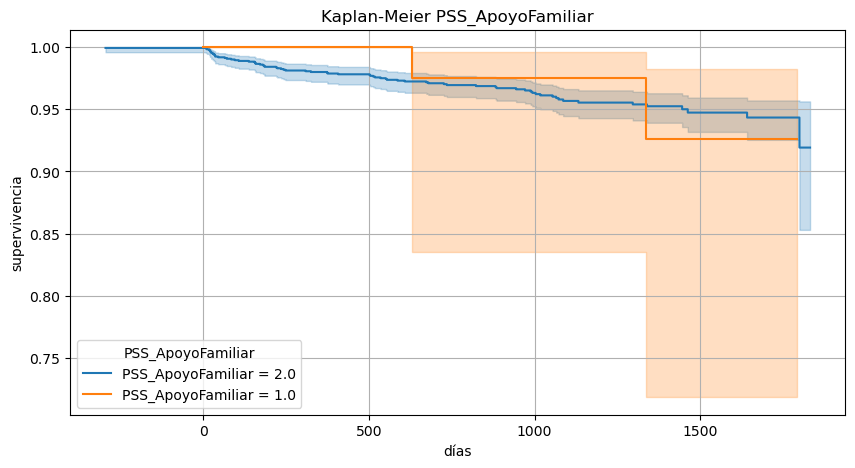

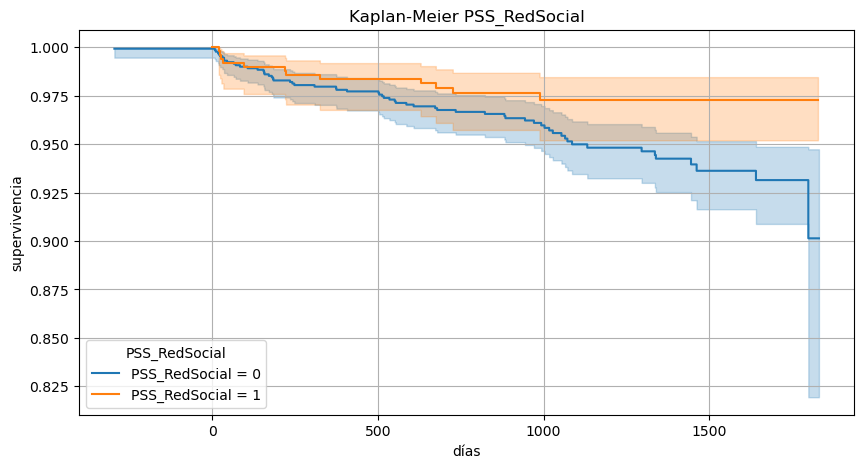

In [8]:
## SOCIAL

data['Fecha_entrada'] = pd.to_datetime(data['FOL_FechaEntrada'], errors='coerce')
data['Fecha_fin_seguimiento'] = pd.to_datetime(data['FOL_FechaEstadoVital'], errors='coerce')
datarelevant = data.dropna(subset=['Fecha_entrada', 'Fecha_fin_seguimiento'])
datarelevant['Tiempo'] = (datarelevant['Fecha_fin_seguimiento']-datarelevant['Fecha_entrada']).dt.days
datarelevant = datarelevant.dropna(subset=['Tiempo', 'Muerte CV', 'MH_Sexo'])
pss_columns = [col for col in datarelevant.columns if col.startswith('PSS_')]

# KaplanMeierFitter
kmf = KaplanMeierFitter()

for pss_col in pss_columns:
    plt.figure(figsize=(10, 5))
    for i in datarelevant[pss_col].dropna().unique():
        ix = datarelevant[pss_col] == i
        kmf.fit(datarelevant['Tiempo'][ix], datarelevant['Muerte CV'][ix], label=f"{pss_col} = {i}")
        kmf.plot()
    plt.title(f'Kaplan-Meier {pss_col}')
    plt.xlabel('días')
    plt.ylabel('supervivencia')
    plt.legend(title=pss_col)
    plt.grid(True)
    plt.show()